In [ ]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
import io 

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataset1 = pd.read_excel("/content/drive/MyDrive/datasett/finaldataset-2020-.xlsx")

In [ ]:
dataset1

,comment_text,toxic,threat,obscene,insult,racism,Labelss
0,এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার! যত...,1,0,0,1,0,insult
1,"আসিফ খানকির পোলা, তোর মারে কুত্তা দিয়ে চুদে তো...",1,0,1,0,0,obscene
2,শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...,1,0,0,1,0,insult
3,এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক।,1,0,0,1,0,insult
4,নাস্তিকতা মানে ই মানুষিক রোগী ।,1,0,0,0,1,racism
...,...,...,...,...,...,...,...
20198,চাকমা মারমা একই না? চীন তাদের লাথি মেরেছে। আ...,1,0,0,0,1,racism
20199,চাকমা মানি চাইনিজ মাফিয়া,1,0,0,0,1,racism
20200,কাক কালো। আফ্রিকান কালো। তুমিও কালো। পাউডার ...,1,0,0,0,1,racism
20201,খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি,1,0,0,0,1,racism


In [ ]:
dataset1=dataset1.drop(['threat','obscene','insult','racism','toxic'],axis=1)

In [ ]:
print(dataset1.dtypes)

comment_text    object
Labelss         object
dtype: object


In [ ]:
dataset1.isnull().sum()

comment_text    0
Labelss         0
dtype: int64

In [ ]:
dataset1

,comment_text,Labelss
0,এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার! যত...,insult
1,"আসিফ খানকির পোলা, তোর মারে কুত্তা দিয়ে চুদে তো...",obscene
2,শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...,insult
3,এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক।,insult
4,নাস্তিকতা মানে ই মানুষিক রোগী ।,racism
...,...,...
20198,চাকমা মারমা একই না? চীন তাদের লাথি মেরেছে। আ...,racism
20199,চাকমা মানি চাইনিজ মাফিয়া,racism
20200,কাক কালো। আফ্রিকান কালো। তুমিও কালো। পাউডার ...,racism
20201,খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি,racism


In [ ]:
#remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        text=text.replace('।','')
        text=text.replace('৷','')
        text=text.replace('\n','')
    return text


#data['comment_text'] = data['comment_text'].str.replace('“”‘’','')
#data['comment_text'] = data['comment_text'].str.replace('’‘“”,'')

 #dataset2['comment_text'] = dataset2['comment_text'].str.replace('।','')

dataset1['comment_text'] = dataset1['comment_text'].apply(remove_punctuations)

In [ ]:
dataset1['comment_text'].head(10000)

0       এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার যত্...
1       আসিফ খানকির পোলা তোর মারে কুত্তা দিয়ে চুদে তোর...
2       শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...
3         এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক
4                          নাস্তিকতা মানে ই মানুষিক রোগী 
                              ...                        
9995    ভাত খাইতে বসছিলাম তোর এই নলাসুদা ছবি দেইখা খান...
9996    আজকের এই ছবিতেও যদি তুই গালি খাও অবশ্য খাইতেছ ...
9997                 এত কিছুর ভীড়ে এটা ভুলে যাওয়া উচিত না
9998                  ২০১৫ সালের নিউজ দিয়ে গুজব ছড়াবেন না
9999                    খানকির পোলা খায় শুটকি সুদে পেত্নি
Name: comment_text, Length: 10000, dtype: object

In [ ]:
#remove emojis
import re


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u09E6-\u09EF"#banglanumerical code
                               u"\u0030-\u0039"#englishnumercal code
                               u"\u0041-\u005A"#uppercaseenglish alphabet
                               u"\u0061-\u007A"#lowercaseenglish alphabet
                               u"\u2019"
                               u"\u2018"
                               u"\u201C"
                               u"\u201D"
                               u"\u201E"
                               u"\u201F"

                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

dataset1['new']=dataset1['comment_text'].apply(remove_emoji)

In [ ]:
dataset1

,comment_text,Labelss,new
0,এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার যত্...,insult,এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার যত্...
1,আসিফ খানকির পোলা তোর মারে কুত্তা দিয়ে চুদে তোর...,obscene,আসিফ খানকির পোলা তোর মারে কুত্তা দিয়ে চুদে তোর...
2,শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...,insult,শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...
3,এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক,insult,এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক
4,নাস্তিকতা মানে ই মানুষিক রোগী,racism,নাস্তিকতা মানে ই মানুষিক রোগী
...,...,...,...
20198,চাকমা মারমা একই না চীন তাদের লাথি মেরেছে আর ...,racism,চাকমা মারমা একই না চীন তাদের লাথি মেরেছে আর ...
20199,চাকমা মানি চাইনিজ মাফিয়া,racism,চাকমা মানি চাইনিজ মাফিয়া
20200,কাক কালো আফ্রিকান কালো তুমিও কালো পাউডার দিয...,racism,কাক কালো আফ্রিকান কালো তুমিও কালো পাউডার দিয...
20201,খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি,racism,খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি


In [ ]:
columns_titles = ["new","comment_text","Labelss"]
multitoxicdata=dataset1.reindex(columns=columns_titles)

In [ ]:
multitoxicdata

,new,comment_text,Labelss
0,এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার যত্...,এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার যত্...,insult
1,আসিফ খানকির পোলা তোর মারে কুত্তা দিয়ে চুদে তোর...,আসিফ খানকির পোলা তোর মারে কুত্তা দিয়ে চুদে তোর...,obscene
2,শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...,শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...,insult
3,এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক,এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক,insult
4,নাস্তিকতা মানে ই মানুষিক রোগী,নাস্তিকতা মানে ই মানুষিক রোগী,racism
...,...,...,...
20198,চাকমা মারমা একই না চীন তাদের লাথি মেরেছে আর ...,চাকমা মারমা একই না চীন তাদের লাথি মেরেছে আর ...,racism
20199,চাকমা মানি চাইনিজ মাফিয়া,চাকমা মানি চাইনিজ মাফিয়া,racism
20200,কাক কালো আফ্রিকান কালো তুমিও কালো পাউডার দিয...,কাক কালো আফ্রিকান কালো তুমিও কালো পাউডার দিয...,racism
20201,খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি,খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি,racism


In [ ]:
import nltk
nltk.download('punkt')

multitoxicdata['new'] = multitoxicdata.apply(lambda row: nltk.word_tokenize(row['new']), axis=1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sw = pd.read_csv("/content/drive/MyDrive/datasett/stopwords-bn [MConverter.eu].csv")
sw.columns = ['Words']
sw.head()
sw = sw['Words']
sw.shape

(397,)

In [ ]:
stop_words = ['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা',
       'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়',
       'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন',
       'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার',
       'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে',
       'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর',
       'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা',
       'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের',
       'দ্বারা', 'আসো','হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি',
       'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য','দেখাচ্ছে','এইসব','একই','চায়','দিয়ে','অথচ','নিয়ে','বাকি','কিন্তু','এদের','অনেক','পারেনা','দেখান' ,'এক' ,'হয়ে','করছে ','ছাড়া','তুই','তোর','তুমিও','দেয়া ','থেকে','ওয়া','নিজার','ছিঃ','কিছু','থাকে','তুর','তো','তরফ','দিয়েছে','রেখে', 'গেছে ','তে',
      'আপনারা','হয়ে','যাবো','আইতেছি','এর','চাই','কিরে','সবাই','দিছে','দিবো','দিব','দিলি','রে','তোমাদের','যাব','আজকের','থাক','একসাথে','যাও','করেছি','তুরে','করলো','কারো','আসলো','এভাবে','তোমরা','এসেছে','দিচ্ছে','এইটা','দিলে','দিলো','করো','আসবে','একদিন','হতো','দেই','দাও','উনার','দেখলাম','লাগছে','আপনাদের','দেখলে','আসে','দেয়','দিলাম','কই','তোদের','কর','ছিলো','দে','তোকে','করুন','দিবে','পড়ে','যেয়ে','এরকম','এতো','তরে','ওরে','লাগে','তর','টা','দিয়া','তোমার','অর','একটু','আপনাদেরকে','তোমাকে','একজন','দেয়া','আপনারটা','আপনাকে','মত','আপনিও','আপনিই','আনা','হয়েছে','আজকে','তোরে','আজও','আছোস','আছি','আচ্ছা','আজকে','আছিলি','আছিস','আছেন','আগেও','আমরাও','আমিও','আরে','আরেক','আরেকজনকে','করছি','আসেন','ইউ','ইকটু','ইয়ে','ইয়েস']
for i in range(sw.shape[0]):
    stop_words.append(sw[i])
print(type(stop_words))
print(len(stop_words))
print(stop_words)

multitoxicdata['new']=multitoxicdata['new'].apply(lambda x: [item for item in x if item not in stop_words])

<class 'list'>
646
['এ', 'হয়', 'কি', 'কী', 'এর', 'কে', 'যে', 'এই', 'বা', 'সব', 'টি', 'তা', 'সে', 'তাই', 'সেই', 'তার', 'আগে', 'যদি', 'আছে', 'আমি', 'এবং', 'করে', 'কার', 'এটি', 'হতে', 'যায়', 'আরও', 'যাক', 'খুব', 'উপর', 'পরে', 'হবে', 'কেন', 'কখন', 'সকল', 'হয়', 'ঠিক', 'একই', 'কোন', 'ছিল', 'খুবই', 'কোনো', 'অধীন', 'যারা', 'তারা', 'গুলি', 'তাকে', 'সেটা', 'সময়', 'আমার', 'আমরা', 'সবার', 'উভয়', 'একটা', 'আপনি', 'নিয়ে', 'একটি', 'বন্ধ', 'জন্য', 'শুধু', 'যেটা', 'উচিত', 'মাঝে', 'থেকে', 'করবে', 'আবার', 'উপরে', 'সেটি', 'কিছু', 'কারণ', 'যেমন', 'তিনি', 'মধ্যে', 'আমাকে', 'করছেন', 'তুলনা', 'তারপর', 'নিজেই', 'থাকার', 'নিজের', 'পারেন', 'একবার', 'সঙ্গে', 'ইচ্ছা', 'নীচের', 'এগুলো', 'আপনার', 'অধীনে', 'কিংবা', 'এখানে', 'তাহলে', 'কয়েক', 'জন্যে', 'হচ্ছে', 'তাদের', 'কোথায়', 'কিন্তু', 'নিজেকে', 'যতক্ষণ', 'আমাদের', 'দ্বারা', 'আসো', 'হয়েছে', ' সঙ্গে', 'সেখানে', 'কিভাবে', 'মাধ্যমে', 'নিজেদের', 'তুলনায়', 'প্রতিটি', 'তাদেরকে', 'ইত্যাদি', 'সম্পর্কে', 'সর্বাধিক', 'বিরুদ্ধে', 'অন্যান্য', 'দেখাচ্ছে', 'এইসব', 'একই', 'চা

In [ ]:
multitoxicdata

,new,comment_text,Labelss
0,"[গুলার, জায়গামতো, চুঁচড়া, লাগিয়ে, দরকার, যত্তস...",এই গুলার জায়গামতো চুঁচড়া লাগিয়ে দেয়া দরকার যত্...,insult
1,"[আসিফ, খানকির, পোলা, মারে, কুত্তা, চুদে, পয়দা,...",আসিফ খানকির পোলা তোর মারে কুত্তা দিয়ে চুদে তোর...,obscene
2,"[শুয়োরের, জ্ঞান, সীমিত, সারাদিন, গাঁজাখোরদের, ...",শুয়োরের জ্ঞান সীমিত তাই সারাদিন গাঁজাখোরদের মত...,insult
3,"[মাদ্রাসার, হোগুরকে, ডিলডো, মেরে, শাস্তি]",এই মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি দেয়া হোক,insult
4,"[নাস্তিকতা, মানে, মানুষিক, রোগী]",নাস্তিকতা মানে ই মানুষিক রোগী,racism
...,...,...,...
20198,"[চাকমা, মারমা, চীন, লাথি, মেরেছে, বাংলাদেশ, মরতে]",চাকমা মারমা একই না চীন তাদের লাথি মেরেছে আর ...,racism
20199,"[চাকমা, মানি, চাইনিজ, মাফিয়া]",চাকমা মানি চাইনিজ মাফিয়া,racism
20200,"[কাক, কালো, আফ্রিকান, কালো, কালো, পাউডার, হোবে...",কাক কালো আফ্রিকান কালো তুমিও কালো পাউডার দিয...,racism
20201,"[খানকি, সুন্দর, নিগা, থাকবি]",খানকি সুন্দর হতে পারে কিন্তু তুই নিগা থাকবি,racism


In [ ]:
multitoxicdata["joint"]= multitoxicdata["new"].str.join(" ")

In [ ]:
multitoxicdata['joint']

0           গুলার জায়গামতো চুঁচড়া লাগিয়ে দরকার যত্তসব ভন্ড
1             আসিফ খানকির পোলা মারে কুত্তা চুদে পয়দা করসিল
2        শুয়োরের জ্ঞান সীমিত সারাদিন গাঁজাখোরদের চিল্লা...
3                      মাদ্রাসার হোগুরকে ডিলডো মেরে শাস্তি
4                              নাস্তিকতা মানে মানুষিক রোগী
                               ...                        
20198            চাকমা মারমা চীন লাথি মেরেছে বাংলাদেশ মরতে
20199                            চাকমা মানি চাইনিজ মাফিয়া
20200           কাক কালো আফ্রিকান কালো কালো পাউডার হোবে গো
20201                              খানকি সুন্দর নিগা থাকবি
20202                                     শালা গরিব বাচ্চা
Name: joint, Length: 20203, dtype: object

In [ ]:
multitoxicdata['Labelss'].value_counts()

not toxic    9769
obscene      3933
threat       2841
insult       2075
racism       1585
Name: Labelss, dtype: int64

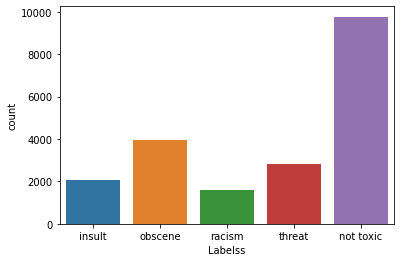

In [ ]:
import seaborn as sns
sns.countplot(x='Labelss',data=multitoxicdata)

In [ ]:
#import label encoder 
from sklearn import preprocessing
#creating object
LE= preprocessing.LabelEncoder()
#Encode 
multitoxicdata['new_label'] = LE.fit_transform(multitoxicdata['Labelss']) 

In [ ]:
multitoxicdata.new_label

0        0
1        2
2        0
3        0
4        3
        ..
20198    3
20199    3
20200    3
20201    3
20202    3
Name: new_label, Length: 20203, dtype: int64

In [ ]:

import numpy as np
import pandas as pd
from plotly.offline import iplot
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

In [ ]:
comment=multitoxicdata['joint'].values.tolist()


In [ ]:
vocab_size = 40000
embedding_dim = 100
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"


In [ ]:
tokenizer = Tokenizer(num_words=40000, oov_token=oov_tok)
tokenizer.fit_on_texts(comment)

word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(comment)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(word_index)

print(padded.shape)

{'<OOV>': 1, 'কথা': 2, 'ভাই': 3, 'সাথে': 4, 'ভালো': 5, 'মানুষ': 6, 'নাটক': 7, 'মাগি': 8, 'দরকার': 9, 'পোলা': 10, 'মাগির': 11, 'জুতা': 12, 'বাচ্চা': 13, 'বড়': 14, 'মারা': 15, 'বালের': 16, 'টাকা': 17, 'খারাপ': 18, 'খানকির': 19, 'মেয়ে': 20, 'সময়': 21, 'বাল': 22, 'বের': 23, 'মা': 24, 'দেশের': 25, 'নাম': 26, 'চুদি': 27, 'হাত': 28, 'শেষ': 29, 'পুটকি': 30, 'শালা': 31, 'ভাল': 32, 'দুধ': 33, 'দিমু': 34, 'আল্লাহ': 35, 'মেরে': 36, 'ছেলে': 37, 'দেশ': 38, 'দেখি': 39, 'খানকি': 40, 'মুখে': 41, 'দেশে': 42, 'বাংলাদেশের': 43, 'গালি': 44, 'ভিডিও': 45, 'সালা': 46, 'বললাম': 47, 'বাংলাদেশ': 48, 'বাবা': 49, 'সানাই': 50, 'মানুষের': 51, 'কইরা': 52, 'চোদা': 53, 'সুন্দর': 54, 'মাগী': 55, 'কুত্তা': 56, 'ছবি': 57, 'পুত': 58, 'জয়': 59, 'হাতে': 60, 'মারে': 61, 'মালাউন': 62, 'মন': 63, 'কুত্তার': 64, 'এসব': 65, 'লাল': 66, 'মাথা': 67, 'বিচার': 68, 'কেটে': 69, 'পাগল': 70, 'থাকলে': 71, 'মানে': 72, 'আবাল': 73, 'বছর': 74, 'মার': 75, 'কেমন': 76, 'হিরো': 77, 'চুদা': 78, 'কমেন্ট': 79, 'হালা': 80, 'লোক': 81, 'আসলে': 82, 'জানি'

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from matplotlib import pyplot
oversamplee = RandomOverSampler(random_state=50)
Xxx, yyy = oversamplee.fit_resample(padded,multitoxicdata['new_label'])
counter = Counter(yyy)
print(counter)

Counter({0: 9769, 2: 9769, 3: 9769, 4: 9769, 1: 9769})


In [ ]:
Xxx

array([[ 3325, 14141, 14142, ...,     0,     0,     0],
       [ 2368,    19,    10, ...,     0,     0,     0],
       [  795,   796,  5369, ...,     0,     0,     0],
       ...,
       [10503, 24923,  1555, ...,     0,     0,     0],
       [ 4037,  9885,  9886, ...,     0,     0,     0],
       [  102, 26087, 26088, ...,     0,     0,     0]], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
X =Xxx
Y = to_categorical(yyy)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=50, test_size=0.15,stratify=Y)

testing_labels = Y_test
training_labels = Y_train

In [ ]:
import numpy as np
training_padded = np.array(X_train)
testing_padded = np.array(X_test)
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)

In [ ]:
import tensorflow as tf

In [ ]:
#15epooc:section

In [ ]:
model15 = tf.keras.Sequential([
tf.keras.layers.Embedding(40000,100,input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])
model15.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model15.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 100)          4000000   
                                                                 
 conv1d_2 (Conv1D)           (None, 120, 32)           9632      
                                                                 
 dropout_4 (Dropout)         (None, 120, 32)           0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 60, 32)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1920)              0         
                                                                 
 dense_4 (Dense)             (None, 64)                122944    
                                                      

In [ ]:
#Final

In [ ]:
print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)
num_epochs = 15
history155 = model15.fit(training_padded, training_labels, epochs=num_epochs ,validation_data=(testing_padded, testing_labels),
                   callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15), #stop training if accuracy doesn't improve in next 3 epoch
        tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/datasett/Saved_Models/embeddinglayerDeeplearningModels/FinalModelCNNembed.hdf5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_frequency=1)
    ])

(41518, 120)
(41518, 5)
(7327, 120)
(7327, 5)
Epoch 1/15
1298/1298 [==============================] - ETA: 0s - loss: 0.9026 - accuracy: 0.6532
Epoch 1: val_loss improved from inf to 0.52640, saving model to /content/drive/MyDrive/datasett/Saved_Models/embeddinglayerDeeplearningModels/FinalModelCNNembed.hdf5
1298/1298 [==============================] - 44s 33ms/step - loss: 0.9026 - accuracy: 0.6532 - val_loss: 0.5264 - val_accuracy: 0.8257
Epoch 2/15
1297/1298 [============================>.] - ETA: 0s - loss: 0.3920 - accuracy: 0.8744
Epoch 2: val_loss improved from 0.52640 to 0.36075, saving model to /content/drive/MyDrive/datasett/Saved_Models/embeddinglayerDeeplearningModels/FinalModelCNNembed.hdf5
1298/1298 [==============================] - 45s 35ms/step - loss: 0.3919 - accuracy: 0.8744 - val_loss: 0.3607 - val_accuracy: 0.8866
Epoch 3/15
1298/1298 [==============================] - ETA: 0s - loss: 0.2646 - accuracy: 0.9207
Epoch 3: val_loss improved from 0.36075 to 0.29044, sa

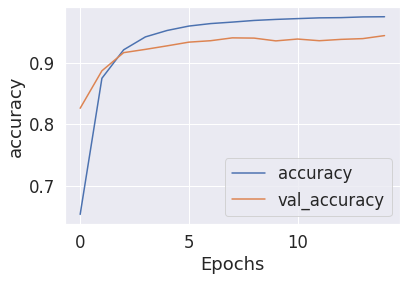

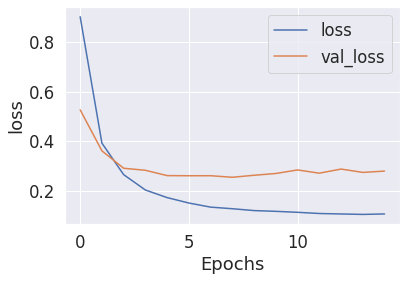

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history155, "accuracy")
plot_graphs(history155, "loss")

In [ ]:
#loadSavedModel

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/datasett/Saved_Models/embeddinglayerDeeplearningModels/FinalModelCNNembed.hdf5')

In [ ]:
losss,accc=model.evaluate(testing_padded,testing_labels)
print('Test accuracy:%f'%(accc*100))

229/229 [==============================] - 2s 6ms/step - loss: 0.2540 - accuracy: 0.9401
Test accuracy:94.008464


In [ ]:
losss,accc=model.evaluate(training_padded,training_labels)
print('Train accuracy:%f'%(accc*100))

1298/1298 [==============================] - 7s 5ms/step - loss: 0.0769 - accuracy: 0.9787
Train accuracy:97.868395


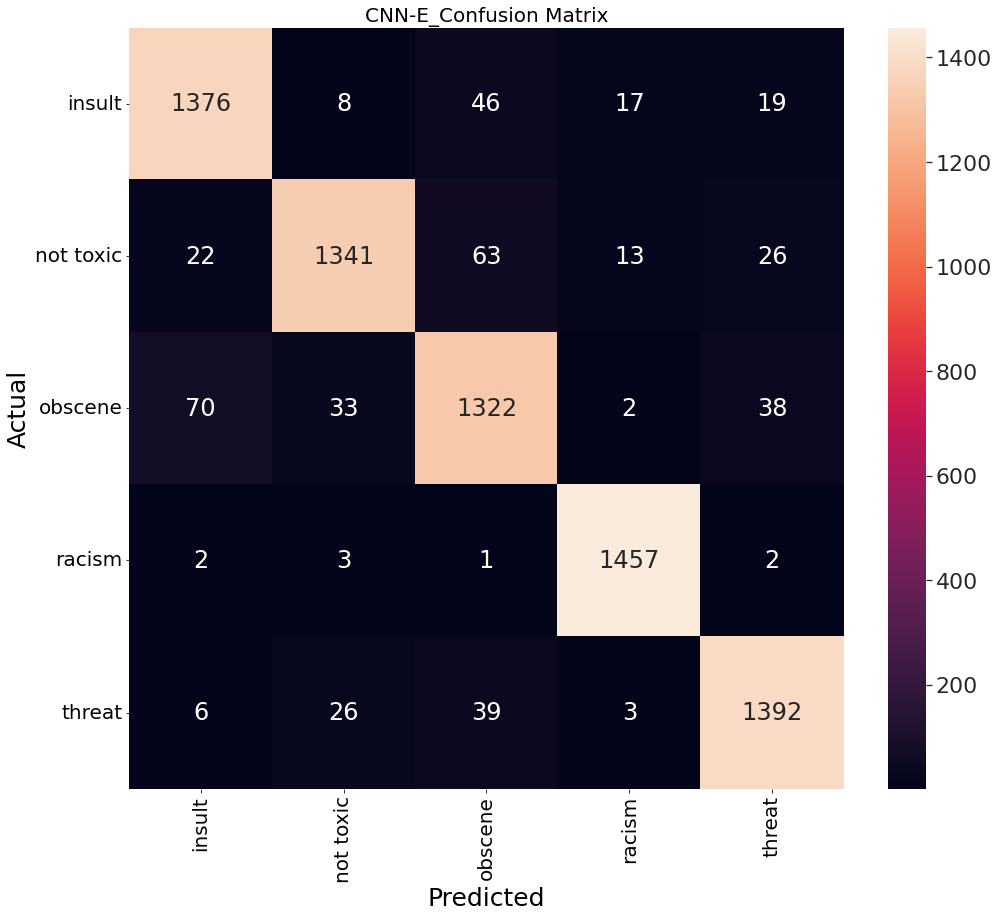

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

### Confusion Matrix
from sklearn.metrics import confusion_matrix
rounded_predictions15 = np.argmax(model.predict(testing_padded), axis=-1)
rounded_labels15=np.argmax(testing_labels, axis=1)
cm = cm = confusion_matrix(y_true=rounded_labels15, y_pred=rounded_predictions15)


class_names = ['insult','not toxic','obscene','racism','threat']


fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.set(font_scale=2) 
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); 

ax.set_xlabel('Predicted', fontsize=25)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 20)
ax.xaxis.tick_bottom()

ax.set_ylabel('Actual', fontsize=25)
ax.yaxis.set_ticklabels(class_names, fontsize = 20)
plt.yticks(rotation=0)

plt.title('CNN-E_Confusion Matrix', fontsize=20)

plt.savefig('/content/drive/MyDrive/datasett/images of models/confusionEmbedding DL/CNNembed_confusionmatrix.png')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(rounded_labels15,rounded_predictions15))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      1466
           1       0.95      0.92      0.93      1465
           2       0.90      0.90      0.90      1465
           3       0.98      0.99      0.99      1465
           4       0.94      0.95      0.95      1466

    accuracy                           0.94      7327
   macro avg       0.94      0.94      0.94      7327
weighted avg       0.94      0.94      0.94      7327



In [ ]:
from sklearn.metrics import precision_score, recall_score ,f1_score

In [ ]:
ECNNF1=f1_score(rounded_labels15,rounded_predictions15,average='weighted')
print(ECNNF1)

0.9399881881744511


In [ ]:
ECNNRecall=recall_score(rounded_labels15,rounded_predictions15,average='weighted')
print(ECNNRecall)

0.9400846185341886


In [ ]:
ECNNPrecision=precision_score(rounded_labels15,rounded_predictions15,average='weighted')
print(ECNNPrecision)

0.9400672476413983


In [ ]:
from sklearn.metrics import precision_recall_fscore_support
def specificity(test,predict):
  res = []
  for l in [0,1,2,3,4]:
    prec,recall,_,_ = precision_recall_fscore_support(np.array(test)==l,
                                                      np.array(predict)==l,
                                                      pos_label=True,average=None)
    res.append(recall[0])
  return res
def weightspecificiyforDL(weights):
 s0=weights[0]*1466
 s1=weights[1]*1465
 s2=weights[2]*1465
 s3=weights[3]*1465
 s4=weights[4]*1466
 weight=(s0+s1+s2+s3+s4)/7327
 return weight


0.9850208805140162


In [ ]:
specificityCNNembedd=specificity(rounded_labels15,rounded_predictions15)

In [ ]:
weightspecCNNembedd=weightspecificiyforDL(specificityCNNembedd)
print(weightspecLSTMembedd)

0.9850208805140162


In [ ]:
sentence = ['আমি তোমাকে খুন করব ']    
sequences = tokenizer.texts_to_sequences(sentence)
paddedd = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(paddedd)
print(pred)
labels = ['insult','not toxic', 'obscene', 'racism', 'threat' ]
labels[np.argmax(pred)]

[[1.7031747e-03 2.5968787e-01 1.5374114e-01 6.4356049e-05 5.8480346e-01]]


'threat'